In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [279]:
boston_cal_df = pd.read_csv('/Users/quentinlachaud/Documents/Documents - Quacbook/code/airbnb_project_home/data/boston/calendar.csv')
boston_cal = boston_cal_df.copy()

In [280]:
# Gauging dataset size
display(boston_cal_df.shape)
display(boston_cal.head())

(1308890, 4)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [281]:
# Converting obj to datetime
boston_cal['date'] = pd.to_datetime(boston_cal['date'], format='%Y-%m-%d', errors='coerce')

In [282]:
# Assessing availability ratio
boston_cal['available'].value_counts() / boston_cal.shape[0]

f    0.508716
t    0.491284
Name: available, dtype: float64

In [283]:
# Adding onehot for availability
boston_cal_cat = pd.concat([boston_cal.drop('available', axis=1), pd.get_dummies(boston_cal['available'])], axis=1)
boston_cal_cat.head()

,listing_id,date,price,f,t
0,12147973,2017-09-05,NaN,1,0
1,12147973,2017-09-04,NaN,1,0
2,12147973,2017-09-03,NaN,1,0
3,12147973,2017-09-02,NaN,1,0
4,12147973,2017-09-01,NaN,1,0


In [284]:
# Checking all ids have the same history length (it needed not be the case)
boston_cal_cat.groupby(['listing_id'])['date'].transform(lambda x: x.max() - x.min()).value_counts()

364 days    1308890
Name: date, dtype: int64

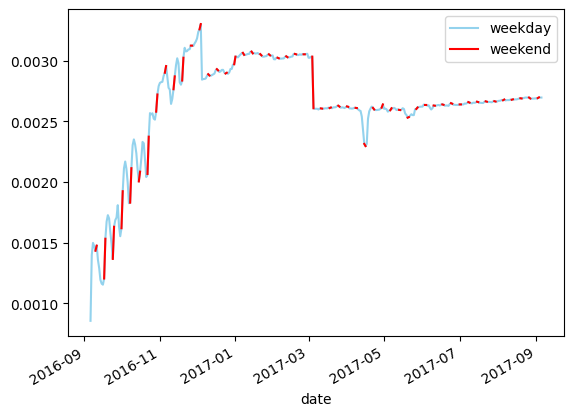

In [285]:
# Available/not available numbers by date in Boston over 2016
boston_cal_cat = boston_cal_cat.groupby(['date'])[['f', 't']].sum().reset_index().sort_values(by='t', ascending=False)
boston_cal_cat['pct_free'] = boston_cal_cat['t'] / sum(boston_cal_cat['f'], boston_cal_cat['t'])

# Assessing vacancy percentage across the year
boston_cal_cat['dow'] = boston_cal_cat['date'].dt.strftime('%a')
boston_cal_cat['weekend'] = np.where(boston_cal_cat['dow'].isin(['Sun', 'Sat']), 1, 0)

# Checking weekend and availability fluctuations
boston_cal_cat = boston_cal_cat.set_index(pd.to_datetime(boston_cal_cat['date']))
boston_cal_cat['pct_free'].plot(c='skyblue', alpha=0.9)
boston_cal_cat[boston_cal_cat['weekend'] == 1].resample('D').mean()['pct_free'].plot(c='red')
plt.legend(['weekday', 'weekend'])